In [72]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st

# DataFrame:

In [73]:
path = r'../../../../data/cost-of-living.csv'
df_living = pd.read_csv(
    filepath_or_buffer=path,
    sep=',',
    decimal='.',
)
path = r'../../../../data/Iris.csv'
df_iris = pd.read_csv(
    filepath_or_buffer=path,
    sep=',',
    decimal='.',
)

# Estatística Inferencial:

## Probabilidade:

### Código:

In [74]:
class  EstatísticaInferencial():
    def descriptive(self, df):
        df = df.describe()
        display(df)

    def teorema_do_limite_central_prática(self, df):
        lista = df['renda_mensal'].values.tolist()
        means = []

        for i in range(20):
            amostra = random.sample(
                population=lista, 
                k=30
            )
            means.append(np.mean(amostra)) 

        sns.histplot(
            data=means,
            kde = True,
        )
    
    def histplot_renda_mensal(self, df):
        sns.histplot(
            data=df,
            x='renda_mensal',
            kde = True,
        )

    def intervalo_de_confiança(self, df):
        amostra = [23, 65, 4, 66, 3, 65, 87, 33, 22, 32, 12, 4, 7, 58, 86, 47]
        teste_95 = st.t.interval(
            alpha=0.95,
            df=len(amostra)-1,
            loc=np.mean(amostra),
            scale=st.sem(amostra)
        )

        teste_99 = st.t.interval(
            alpha=0.99,
            df=len(amostra)-1,
            loc=np.mean(amostra),
            scale=st.sem(amostra)
        )

        print(f'intervalo_de_confiança:\nteste 95:{teste_95}\nteste 99:{teste_99}')
    
    def teste_de_normalização(self, df):
        np.random.seed(100)
        amostra = np.random.randint(10, 50, 90)
        teste_de_normalização_95 = st.norm.interval(
            alpha=0.95,
            loc=np.mean(amostra),
            scale=st.sem(amostra),
        )

        teste_de_normalização_99 = st.norm.interval(
            alpha=0.99,
            loc=np.mean(amostra),
            scale=st.sem(amostra),
        )

        print(f'intervalo_de_confiança:\nTeste De Normalização 95:{teste_de_normalização_95}\nTeste De Normalização 99:{teste_de_normalização_99}')


if __name__ == "__main__":
    estatística_inferencial = EstatísticaInferencial()

### Output:

In [75]:
display(df_living)

,pais,custo,renda_mensal,poder_de_compra
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5
...,...,...,...,...
102,Burma,27.0,95,6.0
103,Pakistan,25.8,125,8.3
104,Kyrgyzstan,25.3,98,6.6
105,Angola,23.0,148,10.9


In [76]:
estatística_inferencial.descriptive(df=df_living)

,custo,renda_mensal,poder_de_compra
count,107.000000,107.000000,107.000000
mean,62.555140,1826.532710,38.150467
std,33.747716,2100.275033,30.588024
min,22.800000,87.000000,3.400000
25%,36.400000,295.000000,14.050000
50%,48.900000,782.000000,25.800000
75%,84.550000,3130.000000,59.100000
max,157.600000,9712.000000,121.100000


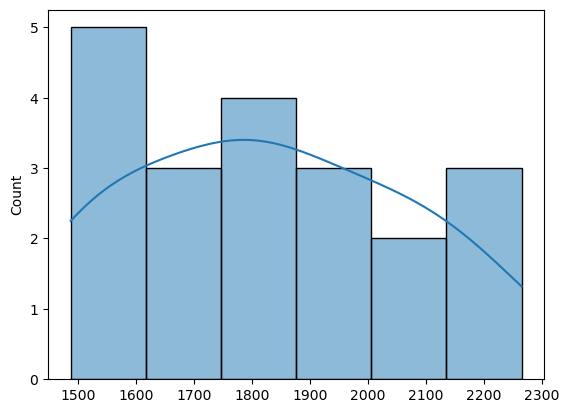

In [77]:
estatística_inferencial.teorema_do_limite_central_prática(df=df_living)

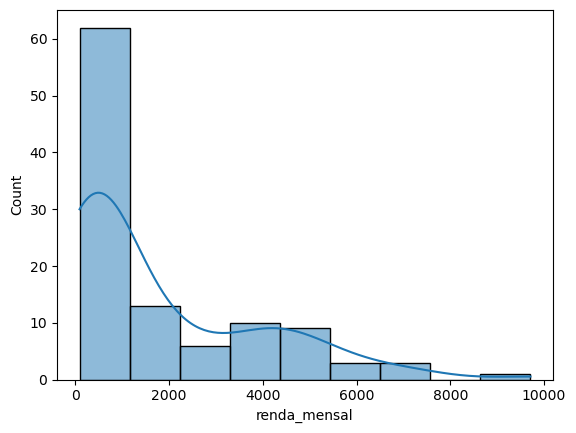

In [78]:
estatística_inferencial.histplot_renda_mensal(df=df_living)

In [79]:
estatística_inferencial.intervalo_de_confiança(df=df_living)

intervalo_de_confiança:
teste 95:(22.602663413349585, 54.14733658665041)
teste 99:(16.56986390514599, 60.18013609485401)


/tmp/ipykernel_28594/928230.py:31: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  teste_95 = st.t.interval(
/tmp/ipykernel_28594/928230.py:38: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  teste_99 = st.t.interval(


In [80]:
estatística_inferencial.teste_de_normalização(df=df_living)

intervalo_de_confiança:
Teste De Normalização 95:(25.878641453003194, 30.87691410255236)
Teste De Normalização 99:(25.09335590589908, 31.662199649656472)


/tmp/ipykernel_28594/928230.py:50: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  teste_de_normalização_95 = st.norm.interval(
/tmp/ipykernel_28594/928230.py:56: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  teste_de_normalização_99 = st.norm.interval(


## Amostras:

### Código:

In [81]:
class EstatísticaInferencial():    
    def amostra_aleatória(self, df):
        amostra = df.sample(
            n=30,
            replace=True,
        )

        display(
            amostra.head(10)
        )

    def amostra_sistemática_aleatória(self, df):
        amostra = df.sample(
            n=30,
            replace=True,
        )
        
        indexes = np.arange(
            start=3, 
            stop=len(amostra), 
            step=3,
        )

        amostra_sistemática = amostra.iloc[indexes]
        display(
            amostra_sistemática
        )
    
    def amostra_estratificada_aleatória(self, df):
        amostra = df.groupby(
            by='Species',
            group_keys=False,
        ).apply(lambda x : x.sample(2))

        display(
            amostra
        )

    def amostragem_clusterizada_aleatória(self, df):
        df = df

        n = len(df)
        k = int(n/30)
        data = None
        for k in range(k):
            sample_k = df.sample(30)
            sample_k['cluster'] = np.repeat(
                a=k, 
                repeats=len(sample_k),
            )
            df = df.drop(
                index= sample_k.index
            )
            data = pd.concat(
                objs=[data, sample_k],
                axis=0
            )

        escolha_cluster_aleatório = np.random.randint(
            low=0,
            high=k,
            size=2,
        )

        amostra = data[
            data.cluster.isin(escolha_cluster_aleatório)
        ]

        # display(amostra)
        display(amostra.groupby(['cluster'])['cluster'].count())


if __name__ == "__main__":
    estatística_inferencial = EstatísticaInferencial()

### Output:

In [82]:
estatística_inferencial.amostra_aleatória(df=df_living)

,pais,custo,renda_mensal,poder_de_compra
48,Ecuador,51.9,494,16.2
21,Belgium,97.0,4209,74.0
25,South Korea,87.0,2915,57.1
54,Bulgaria,47.5,893,32.0
6,Turks and Caicos Islands,124.6,1967,26.9
37,Czechia,68.1,2006,50.2
102,Burma,27.0,95,6.0
58,Morocco,45.0,279,10.6
39,China,63.2,991,26.7
94,Sri Lanka,30.4,318,17.8


In [83]:
estatística_inferencial.amostra_sistemática_aleatória(df=df_living)

,pais,custo,renda_mensal,poder_de_compra
30,Malta,75.7,2547,57.3
93,Tunisia,30.9,303,16.7
57,Brazil,46.9,643,23.4
104,Kyrgyzstan,25.3,98,6.6
66,Nigeria,41.8,175,7.1
51,Poland,51.1,1389,46.3
67,Kosovo,41.0,414,17.2
54,Bulgaria,47.5,893,32.0
1,Switzerland,142.4,7530,90.1


In [84]:
estatística_inferencial.amostra_estratificada_aleatória(df=df_iris)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
8,9,4.4,2.9,1.4,0.2,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
125,126,7.2,3.2,6.0,1.8,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica


In [85]:
estatística_inferencial.amostragem_clusterizada_aleatória(df=df_living)

cluster
0    30
1    30
Name: cluster, dtype: int64